<font color="Green"><h1> **Intro to Deep Learning Mini Project 2 - NLP Disaster Tweets**</h1></font>
<font color="Green"><h2> **Github Link**</h2></font>
<p><a href = "https://github.com/Connor-Crosslin/Natural-Language-Processing-with-Disaster-Tweets/blob/main/Disaster%20Tweets%20Deep%20Learning%20Project.ipynb">Github Link</a></p>

<font color="Green"><h2> **Problem Statement**</h2></font>
<p>
<b> Given a set of tweets with disaster-related language, discern which are actual disasters.</b>
</p>

In [1]:
#import libraries and functions

import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import tensorflow as tf

<font color="Green"><h2> **Exploratory Data Analysis and Preprocessing**</h2></font>
<p>

In [2]:
#get the raw data
train_data = pd.read_csv('Data/disaster_train_raw.csv')
test_data = pd.read_csv('Data/disaster_test_raw.csv')

#look at the raw data
print(train_data.info())
print(train_data.head())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
                 id      target
coun

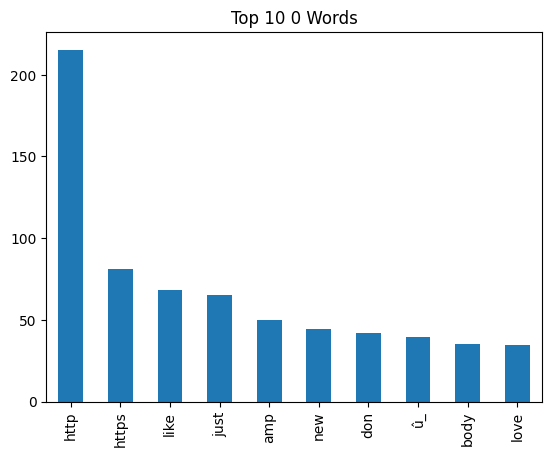

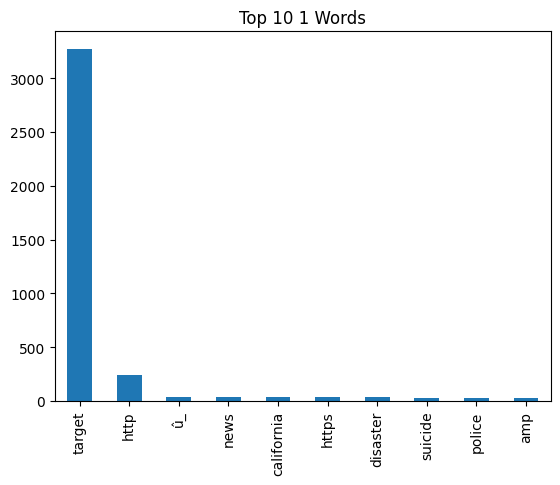

In [3]:
tfidf = TfidfVectorizer(sublinear_tf= True, min_df = 5, norm = 'l2', encoding = 'latin-1', stop_words = 'english', max_features = 4510)
count_vectorized_data = pd.DataFrame(tfidf.fit_transform(train_data['text']).toarray(), columns = tfidf.get_feature_names_out())
labels = train_data['target']
count_vectorized_data_labeled = count_vectorized_data.assign(target = labels)
                    
#plot histograms of top 10 words in each category

for target in [0,1]:
    counts = count_vectorized_data_labeled[count_vectorized_data_labeled['target'] == target]
    sums = counts.sum()
    ten_largest = sums.nlargest(n = 10, keep = 'all')

    plt.figure()
    ten_largest.plot(kind='bar')
    plt.title('Top 10 ' + str(target) + ' Words')
    plt.show()

In [41]:
#preprocess the data 

corpus = []
train_data['tweet_list'] = np.nan

for tweet in range(len(train_data)):
    #get the tweet text
    tweet_txt = train_data['text'][tweet]
    #convert the tweet to a list
    tweet_list = re.sub(r'[^a-zA-Z0-9]', ' ', tweet_txt).split()
    
    train_data['tweet_list'][tweet] = tweet_list
    
    #check to see if each word in the tweet is already in the corpus
    for word in tweet_list:
        # if it isn't, then add it
        if word not in corpus:
            corpus.append(word)
        else:
            continue
            
#same thing with test data

test_data['tweet_list'] = np.nan
for tweet in range(len(test_data)):
    #get the tweet text
    tweet_txt = test_data['text'][tweet]
    #convert the tweet to a list
    tweet_list = re.sub(r'[^a-zA-Z0-9]', ' ', tweet_txt).split()
    
    test_data['tweet_list'][tweet] = tweet_list
    
    #check to see if each word in the tweet is already in the corpus
    for word in tweet_list:
        # if it isn't, then add it
        if word not in corpus:
            corpus.append(word)
        else:
            continue
print(corpus[0:100])

C:\Users\CC\AppData\Local\Temp\ipykernel_7332\3719996421.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['tweet_list'][tweet] = tweet_list
C:\Users\CC\AppData\Local\Temp\ipykernel_7332\3719996421.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['tweet_list'][tweet] = tweet_list


['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all', 'Forest', 'fire', 'near', 'La', 'Ronge', 'Sask', 'Canada', 'All', 'residents', 'asked', 'to', 'shelter', 'in', 'place', 'being', 'notified', 'by', 'officers', 'No', 'other', 'evacuation', 'or', 'orders', 'expected', '13', '000', 'people', 'receive', 'wildfires', 'California', 'Just', 'got', 'sent', 'photo', 'from', 'Ruby', 'Alaska', 'as', 'smoke', 'pours', 'into', 'a', 'school', 'RockyFire', 'Update', 'Hwy', '20', 'closed', 'both', 'directions', 'due', 'Lake', 'County', 'CAfire', 'flood', 'disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'streets', 'Manitou', 'Colorado', 'Springs', 'areas', 'I', 'm', 'on', 'top', 'hill', 'and', 'can', 'see', 'woods', 'There', 's', 'an', 'emergency', 'happening', 'now', 'building', 'across', 'street', 'afraid', 'that', 'tornado']


In [5]:
#define a function to make our vocabulary

def vocab_maker(corpus):
    vocab_dict = {}
    vocab_dict['<pad>'] = 0
    for word in range(len(corpus)):
        if corpus[word] not in vocab_dict.keys():
            vocab_dict[corpus[word]] = len(vocab_dict) 
        else:
            continue
    
    #vocab_dict_swap = {index: token for token, index in vocab_dict.items()}
    
    #return vocab_dict_swap
    return vocab_dict

#define a function to vectorize our data

def vectorizer(vocab, text):
    vectorized_text = []
    for word in text:
        vectorized_text.append(vocab[word])
    return vectorized_text

In [6]:
#make our vocabulary 
vocab = vocab_maker(corpus)

#run our vectorize each tweet

vectorized_train_data = []
for tweet_list in range(len(train_data)):
    vectorized_train_data.append(vectorizer(vocab, train_data['tweet_list'][tweet_list]))
    
vectorized_test_data = []
for tweet_list in range(len(test_data)):
    vectorized_test_data.append(vectorizer(vocab, test_data['tweet_list'][tweet_list]))

#look at some samples of our vectorized data
print(vectorized_train_data[:10])
print(vectorized_test_data[:10])

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26, 27, 3, 28, 29, 30, 31, 32, 33, 34, 35, 25, 26, 27, 36, 3, 37], [38, 39, 40, 41, 42, 34, 36, 26, 43], [44, 45, 46, 7, 47, 48, 49, 50, 51, 52, 48, 42, 53, 54, 55, 56], [57, 58, 43, 59, 60, 61, 26, 62, 63, 64, 24, 65, 66, 15, 67, 42], [68, 69, 70, 71, 72, 73, 74, 6, 75, 26, 76, 77, 78, 79], [80, 81, 82, 83, 6, 4, 84, 85, 80, 86, 87, 55, 15, 26, 4, 88], [89, 90, 91, 92, 34, 93, 94, 26, 4, 95, 96, 4, 97], [80, 81, 98, 99, 4, 100, 101, 102, 24, 103, 104]]
[[44, 745, 55, 3481, 147, 148], [8800, 443, 8, 101, 6306, 5854, 3854, 6831, 952], [611, 101, 55, 11725, 15, 336, 5338, 21955, 25831, 3, 5840, 96, 4, 97, 80, 956, 1616, 331, 13], [1733, 6379, 2303, 42], [9732, 9733, 1251, 3361, 26, 7724, 85, 9734], [141, 268, 15361, 322, 90, 91, 8], [411, 1945, 4999, 770, 5050, 210, 317, 511, 7130, 1975, 2055, 2135, 25832], [1361, 307, 3, 180], [150, 55, 2462, 19288], [7694, 948]]


In [17]:
#convert our input data into clean numpy array, append 0s for sizing
#convert output into numpy array

length = max(map(len, vectorized_train_data))

x_train = np.array([tweet+[0]*(length-len(tweet)) for tweet in vectorized_train_data])
x_test = np.array([tweet+[0]*(length-len(tweet)) for tweet in vectorized_test_data])

y_train = np.array(train_data['target'])

print(x_train, '\n', y_train)
print(x_train.shape)
print(x_train[95].shape)
print(x_test[95].shape)

[[    1     2     3 ...     0     0     0]
 [   14    15    16 ...     0     0     0]
 [   21    22    23 ...     0     0     0]
 ...
 [13137 13138 11972 ...     0     0     0]
 [  255  5551  1685 ...     0     0     0]
 [  183 11126  4986 ...     0     0     0]] 
 [1 1 1 ... 1 1 1]
(7613, 34)
(34,)
(34,)


<font color="Green"><h2> **Model Architecture**</h2></font>
<p> The idea will be to build a simple model and try different numbers of layers, perceptrons, optimizer parameters. We use binary cross entropy for our loss measure as is standard for a binary classification problem like this one. Activations will be sigmoid to that end as well, but we may experiment with others. IN our preprocessing step we tokenized the words available in the tweets and assigned will run our model the list of unqie words in each tweet.


In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(34, input_dim = 34, activation = "softmax"),
    tf.keras.layers.Dense(34, input_dim = 34, activation = "softmax"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer = optimizer, loss = "BinaryCrossentropy", metrics=['accuracy'])

<font color="Green"><h2> **Results and Analysis**</h2></font>
<p>

In [36]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5261 - loss: 0.6929
Epoch 2/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5225 - loss: 0.6929
Epoch 3/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.5315 - loss: 0.6928
Epoch 4/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.5638 - loss: 0.6926
Epoch 5/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - accuracy: 0.5672 - loss: 0.6925
Epoch 6/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.5498 - loss: 0.6925
Epoch 7/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.5690 - loss: 0.6924
Epoch 8/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.5645 - loss: 0.6922
Epoch 9/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.5703 - loss: 0.6920
Epoch 10/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.5622 - loss: 0.6921
Epoch 11/20
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.5641 - loss: 0.6920
Epoch 12/20
238/238 ━━━━━━━━━━━━━━

| Optimizer     | Accuracy      |
| ------------- | ------------- |
| SGD | ~ 0.57 |
| Adam | ~ 0.47 |
| RMSprop | ~ 0.55 |

Stochastic gradient descent yeilds the highest accuracy

| Activations     | Accuracy      |
| ------------- | ------------- |
| Sigmoid | ~ 0.57 |
| Relu | ~ 0.57 |
| SoftMax | ~ 0.47 |

Activation function chocie, as one would expect, does not seem to have a big impact on the accuracy performance of the model.

In [10]:
predictions = list(model.predict(x_test).T)

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
submission_df = pd.DataFrame({'id': test_data['id'], 'label': predictions[0]} )
submission_df.label = submission_df.label.apply(np.round)
submission_df

,id,label
0,0,0.0
1,2,0.0
2,3,0.0
3,9,0.0
4,11,0.0
...,...,...
3258,10861,0.0
3259,10865,0.0
3260,10868,0.0
3261,10874,0.0


In [12]:
submission_df.to_csv('submission.csv', index = False)

<font color="Green"><h2> **Conclusion**</h2></font>
<p>The model build here provides a good foundation for further imrpovements. I toyed with different number of layers and perceptrons for each layer as well as optimizer functions. The Adam optimizer noticeably worked worse than the Stochastic Gradient Descent. Different leanring rates had little impact (up to a point of course, excessively large learning rates hindered performance). Perhaps the addition of a prinicpal component analysis type of method could have been helpful in improving performance for the network and indentifying key words that might indicate validity of disaster.

<font color="Green"><h2> **Reference List**</h2></font>

<a href = "https://keras.io">Keras documentation</a>
<p><a href = "https://scikit-</p>learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html">TFID Vectorizer Documentation</a>
<p><a href = "https://www.machinelearningplus.com/nlp/what-is-tokenization-in-natural-language-processing/">Helpful article tokenization that I used</a>